In [205]:
# importing DF from 'project5_cleaning.ipynb'
%store -r df

import pandas as pd

In [206]:
# How much in total each customer spent 
df_monetary = df.groupby('CustomerID', as_index=False)['Sales'].sum()
df_monetary.head()

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [207]:
# How often the customer made an order
df_frequency = df.groupby('CustomerID', as_index=False)['OrderID'].count()
df_frequency.head()

,CustomerID,OrderID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


In [208]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df["OrderDate"].dtype)

from datetime import timedelta

# Creating RFM features
analysis_date = df['OrderDate'].max() + timedelta(days=1)

# Calculate Recency
df_recency = df.groupby("CustomerID")['OrderDate'].max().reset_index()
df_recency['Recency'] = (analysis_date - df_recency['OrderDate']).dt.days

# **Drop 'Order Date' column**
df_recency = df_recency[["CustomerID", 'Recency']]


datetime64[ns]


In [209]:
# Merging 3 above df into one df for ml modeling purposing

# df_monetary and df_frequency on 'CustomerID'
df_model = pd.merge(df_monetary, df_frequency, on='CustomerID', how='inner')

# resulting DataFrame with df_recency on 'CustomerID'
df_model = pd.merge(df_model, df_recency, on='CustomerID', how='inner')

# Display the final combined DataFrame
df_model.head()

,CustomerID,Sales,OrderID,Recency
0,AA-10315,5563.560,11,185
1,AA-10375,1056.390,15,20
2,AA-10480,1790.512,12,260
3,AA-10645,5086.935,18,56
4,AB-10015,886.156,6,416


In [210]:
df_model = df_model.rename(columns = {'OrderID':'Frequency','Sales':'Amount'})
df_model.head()

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,185
1,AA-10375,1056.390,15,20
2,AA-10480,1790.512,12,260
3,AA-10645,5086.935,18,56
4,AB-10015,886.156,6,416


{'whiskers': [<matplotlib.lines.Line2D at 0x30c97f470>,
 'caps': [<matplotlib.lines.Line2D at 0x30c97fa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x30c97f2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x30c9e4050>],
 'fliers': [<matplotlib.lines.Line2D at 0x30c9e4350>],
 'means': []}

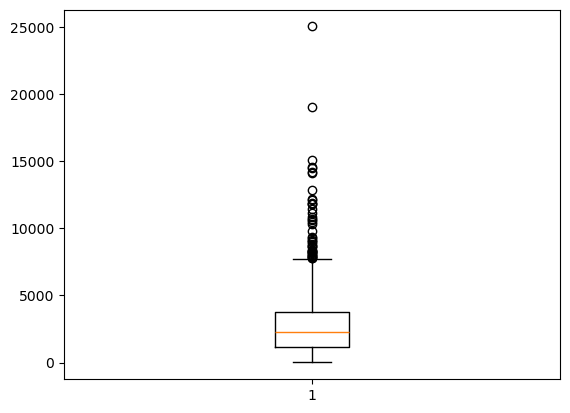

In [211]:
# checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(df_model['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x30c9a9760>,
 'caps': [<matplotlib.lines.Line2D at 0x30c9a9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x30c9a94f0>],
 'medians': [<matplotlib.lines.Line2D at 0x30c9aa2a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30c9aa540>],
 'means': []}

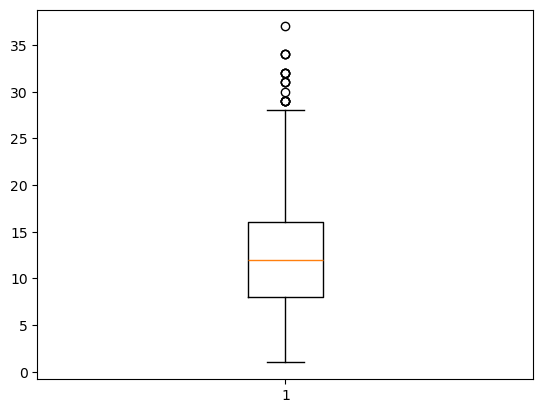

In [212]:
plt.boxplot(df_model['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x30ca65460>,
 'caps': [<matplotlib.lines.Line2D at 0x30ca65970>,
 'boxes': [<matplotlib.lines.Line2D at 0x30ca651f0>],
 'medians': [<matplotlib.lines.Line2D at 0x30ca65dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30ca660c0>],
 'means': []}

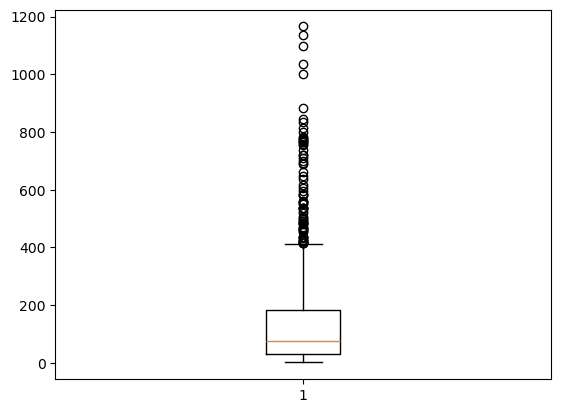

In [213]:
plt.boxplot(df_model['Recency'])

In [214]:
# Cutting out the outliers
import numpy as np
# Calculate Interquartile Range (IQR) for price
q1 = np.percentile(df_model['Amount'], 25)
q3 = np.percentile(df_model['Amount'], 75)
iqr = q3-q1

q1_f = np.percentile(df_model['Frequency'], 25)
q3_f = np.percentile(df_model['Frequency'], 75)
iqr_f = q3_f-q1_f

q1_r = np.percentile(df_model['Recency'], 25)
q3_r = np.percentile(df_model['Recency'], 75)
iqr_r = q3_r-q1_r


In [215]:
df_model_copy = df_model.copy()

In [216]:
df_model = df_model[(df_model['Amount'] > q1-(1.5*iqr)) & (df_model['Amount'] < q3+(1.5*iqr))]
df_model = df_model[(df_model['Frequency'] > q1_f-(1.5*iqr_f)) & (df_model['Frequency'] < q3_f+(1.5*iqr_f))]
df_model = df_model[(df_model['Recency'] > q1_r-(1.5*iqr_r)) & (df_model['Recency'] < q3_r+(1.5*iqr_r))]

{'whiskers': [<matplotlib.lines.Line2D at 0x30cad4620>,
 'caps': [<matplotlib.lines.Line2D at 0x30cad4b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cad4320>],
 'medians': [<matplotlib.lines.Line2D at 0x30cad4f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cad51f0>],
 'means': []}

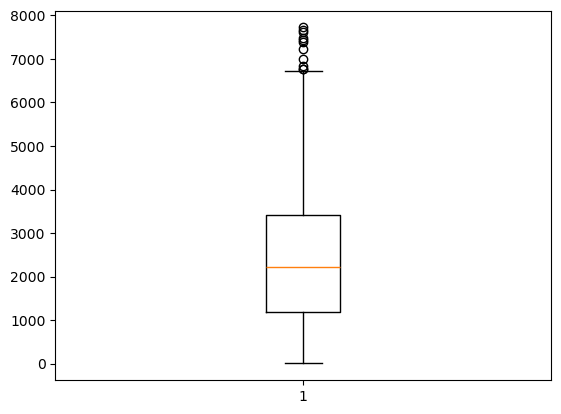

In [217]:
plt.boxplot(df_model['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x30cb1bfe0>,
 'caps': [<matplotlib.lines.Line2D at 0x30cb4c5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cb1be60>],
 'medians': [<matplotlib.lines.Line2D at 0x30cb4cb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cb4ce60>],
 'means': []}

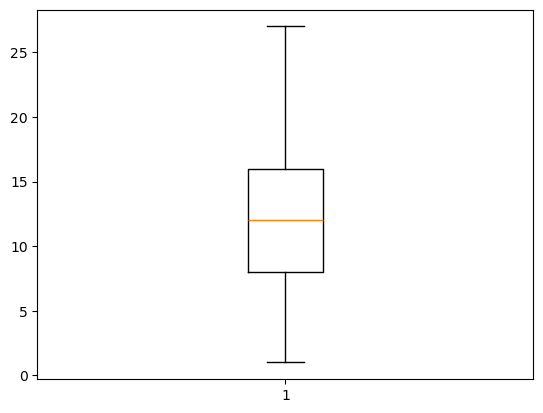

In [218]:
plt.boxplot(df_model['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x30cb82750>,
 'caps': [<matplotlib.lines.Line2D at 0x30cb82d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cb82480>],
 'medians': [<matplotlib.lines.Line2D at 0x30cb82f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cb83140>],
 'means': []}

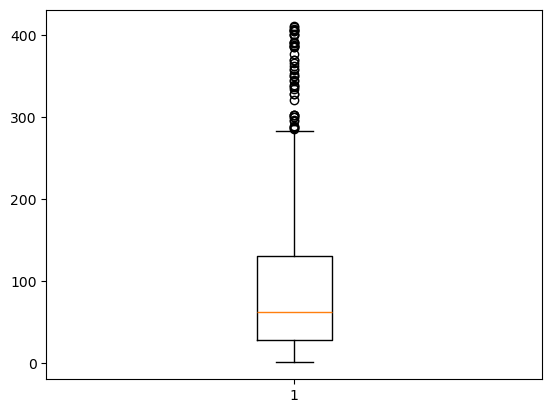

In [219]:
plt.boxplot(df_model['Recency'])

In [220]:
# Recency is very spread, trying to focus on the 2500 - 2650 ???

In [221]:
from sklearn.preprocessing import StandardScaler

# Rescaling the attributes using standarisation scaling
rfm_df = df_model[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_model_scaled = scaler.fit_transform(rfm_df)
df_model_scaled.shape

df_model_scaled = pd.DataFrame(df_model_scaled)
df_model_scaled.columns = ['Amount', 'Frequency', 'Recency']
df_model_scaled.head()

,Amount,Frequency,Recency
0,1.816694,-0.252930,0.871911
1,-0.860709,0.492961,-0.814773
2,-0.424617,-0.066457,1.638585
3,1.533564,1.052379,-0.446769
4,-0.913982,-0.066457,-0.589882


In [222]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_model_scaled)

KMeans(max_iter=50, n_clusters=3)

In [223]:
# Assigning labels to each data point, and execute the following script.

from collections import Counter
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(0, 247), (1, 103), (2, 315)]

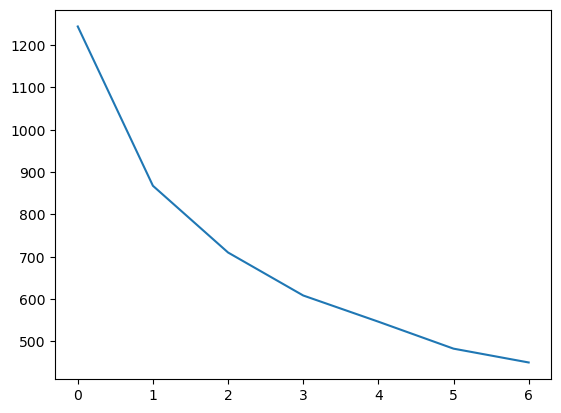

In [254]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] #where is it from ? Always same values?
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_model_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [225]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_model_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_model_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.34055717955067577
For n_clusters=3, the silhouette score is 0.36281641908970086
For n_clusters=4, the silhouette score is 0.31312580698137815
For n_clusters=5, the silhouette score is 0.28291510361257893
For n_clusters=6, the silhouette score is 0.2769721054482584
For n_clusters=7, the silhouette score is 0.32296573265730844
For n_clusters=8, the silhouette score is 0.2799400820009619


In [226]:
# Silhouette analysis for the best score: n=3 
from sklearn.metrics import silhouette_score

    # intialise kmeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_model_scaled)

cluster_labels = kmeans.labels_

    # silhouette score
silhouette_avg = silhouette_score(df_model_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.363179166936144


In [227]:
# assign the label
df_model['Cluster_Id'] = kmeans.labels_
df_model.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,AA-10315,5563.560,11,185,2
1,AA-10375,1056.390,15,20,0
2,AA-10480,1790.512,12,260,1
3,AA-10645,5086.935,18,56,2
7,AB-10150,966.710,12,42,0


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

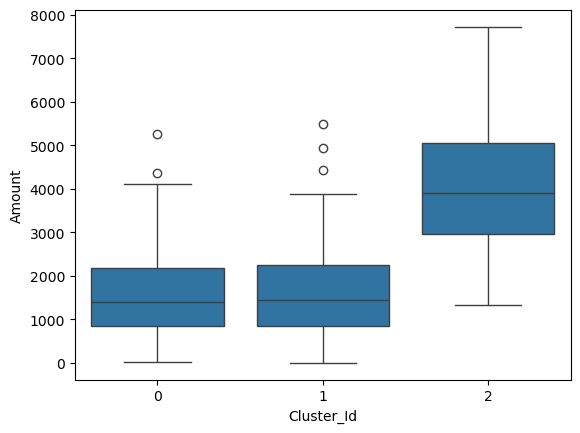

In [228]:
# Box plot to visualize Cluster Id vs Amount 
sns.boxplot(x='Cluster_Id', y='Amount', data=df_model)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

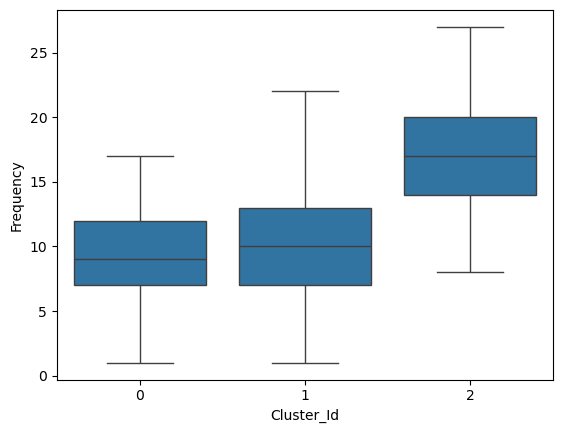

In [229]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_model)


In [231]:
# 3d scatterplot using plotly

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

Scene = dict(xaxis = dict(title  = 'Amount'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Recency'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=df_model['Amount'], y=df_model['Frequency'], z=df_model['Recency'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [232]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [233]:
# Checking clustering with features customer segment, Sales, Profit

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

In [280]:
df_segment = df[['CustomerID', 'Segment']]
df_segment

,CustomerID,Segment
0,CG-12520,Consumer
1,CG-12520,Consumer
2,DV-13045,Corporate
3,SO-20335,Consumer
4,SO-20335,Consumer
...,...,...
9989,TB-21400,Consumer
9990,DB-13060,Consumer
9991,DB-13060,Consumer
9992,DB-13060,Consumer


In [281]:
# Perform one-hot encoding on the 'Segment' column without adding a prefix
df_segment = pd.get_dummies(df_segment, columns=['Segment'], prefix='', prefix_sep='')

# Replace True/False with 1/0 after one-hot encoding
df_segment = df_segment.replace({True: 1, False: 0})

# Display the encoded DataFrame
df_segment.head()

/var/folders/b3/c7kkv0f50sj621z2tvwq2xqh0000gn/T/ipykernel_66563/4028653589.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CustomerID,Consumer,Corporate,Home Office
0,CG-12520,1,0,0
1,CG-12520,1,0,0
2,DV-13045,0,1,0
3,SO-20335,1,0,0
4,SO-20335,1,0,0


In [269]:
# Initialize the Label Encoder
# label_encoder = LabelEncoder()

# Apply label encoding to the 'Segment' column
# df_segment['Segment_Encoded'] = label_encoder.fit_transform(df_segment['Segment'])
# df_segment


In [282]:
df_model2 = pd.merge(df_segment, df_frequency, on='CustomerID', how='inner')

In [283]:
df_model2.isna().sum()

CustomerID     0
Consumer       0
Corporate      0
Home Office    0
OrderID        0
dtype: int64

In [290]:
df_model2 = df_model2.drop('CustomerID', axis = 1)

In [291]:
df_model2 = df_model2.rename(columns = {'OrderID':'Frequency'})

In [292]:
df_model2.head()


,Consumer,Corporate,Home Office,Frequency
0,1,0,0,5
1,1,0,0,5
2,0,1,0,9
3,1,0,0,15
4,1,0,0,15


{'whiskers': [<matplotlib.lines.Line2D at 0x312a10b90>,
 'caps': [<matplotlib.lines.Line2D at 0x312a11eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x312a10470>],
 'medians': [<matplotlib.lines.Line2D at 0x312a13440>],
 'fliers': [<matplotlib.lines.Line2D at 0x312a13fb0>],
 'means': []}

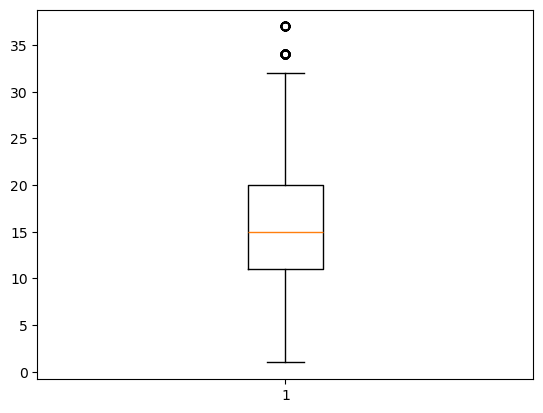

In [286]:
plt.boxplot(df_model2['Frequency'])

In [287]:
q1_f = np.percentile(df_model2['Frequency'], 25)
q3_f = np.percentile(df_model2['Frequency'], 75)
iqr_f = q3_f-q1_f
df_model2 = df_model2[(df_model2['Frequency'] > q1_f-(1.5*iqr_f)) & (df_model2['Frequency'] < q3_f+(1.5*iqr_f))]

In [293]:
# Rescaling the attributes using standarisation scaling
df2 = df_model2[['Consumer', 'Corporate', 'Home Office', 'Frequency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df2_scaled = scaler.fit_transform(df2)
df2_scaled.shape

df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = ['Consumer', 'Corporate', 'Home Office', 'Frequency']
df2_scaled

,Consumer,Corporate,Home Office,Frequency
0,0.961668,-0.664713,-0.459008,-1.654788
1,0.961668,-0.664713,-0.459008,-1.654788
2,-1.039860,1.504409,-0.459008,-1.019645
3,0.961668,-0.664713,-0.459008,-0.066930
4,0.961668,-0.664713,-0.459008,-0.066930
...,...,...,...,...
9850,0.961668,-0.664713,-0.459008,0.250641
9851,0.961668,-0.664713,-0.459008,-0.384502
9852,0.961668,-0.664713,-0.459008,-0.384502
9853,0.961668,-0.664713,-0.459008,-0.384502


In [294]:
df2_scaled.isna().sum()

Consumer       0
Corporate      0
Home Office    0
Frequency      0
dtype: int64

In [302]:
# Fill NaN values with column means
df2_scaled = df2_scaled.fillna(df2_scaled.mean())

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df2_scaled)

# Get labels and count occurrences
from collections import Counter
label_list = kmeans.labels_
print(sorted(Counter(label_list).items()))

[(0, 3020), (1, 5120), (2, 1715)]


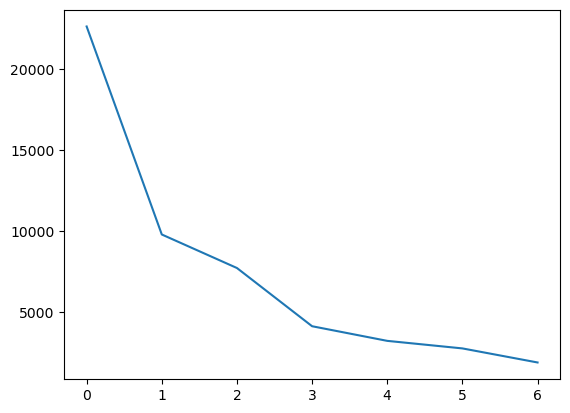

In [303]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [304]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4806181363169796
For n_clusters=3, the silhouette score is 0.6655895569905533
For n_clusters=4, the silhouette score is 0.6193808553826566
For n_clusters=5, the silhouette score is 0.5952267913752273
For n_clusters=6, the silhouette score is 0.5977818387823011
For n_clusters=7, the silhouette score is 0.604455874437015
For n_clusters=8, the silhouette score is 0.5675586405806212


In [307]:
# Silhouette analysis for the best score: n=5 - to avoid overfitting with too many clusters ?
from sklearn.metrics import silhouette_score

    # intialise kmeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df2_scaled)

cluster_labels = kmeans.labels_

    # silhouette score
silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.6655895569905533


import seaborn as sns
import matplotlib.pyplot as plt

# sns.scatterplot with keyword arguments for x and y
sns.scatterplot(x='Segment_Encoded', y='Frequency', hue='label', data=df2_scaled, palette='Set1')

# Adding labels and title
plt.xlabel("Segment Encoded")
plt.ylabel("Frequency")
plt.title("2D Scatter Plot of Clusters")
plt.show()


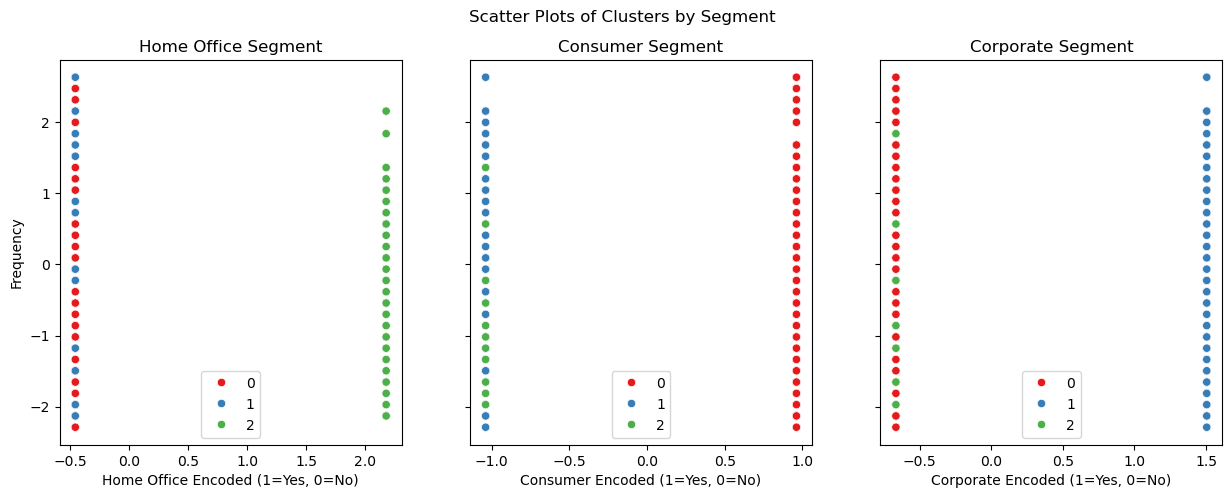

In [309]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, segment in enumerate(['Home Office', 'Consumer', 'Corporate']):
    sns.scatterplot(x=segment, y='Frequency', hue=cluster_labels, data=df2_scaled, palette='Set1', ax=axes[i])
    axes[i].set_title(f"{segment} Segment")
    axes[i].set_xlabel(f"{segment} Encoded (1=Yes, 0=No)")

axes[0].set_ylabel("Frequency")
plt.suptitle("Scatter Plots of Clusters by Segment")
plt.show()
